# <center><b>🚦 Traffic Sign Recognition **System** (with GTSRB Dataset)</b></center>


# **1. 📥 Dataset Download**

This command clones the German Traffic Sign dataset from Bitbucket. It contains training, validation, and test sets in .p format, along with a CSV file describing the sign names.

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Receiving objects: 100% (6/6), 117.80 MiB | 14.13 MiB/s, done.
Updating files: 100% (4/4), done.


Lists the contents of the german-traffic-signs directory to verify that the dataset has been successfully downloaded.

In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


# **2. 📚 Library Imports**
Imports all the necessary libraries for data processing, visualization, image handling, and building the CNN model.

In [3]:
import numpy as np      # For numerical operations
import matplotlib.pyplot as plt     # For plotting graphs and visualizations
import keras     # Main deep learning library
from keras.models import Sequential     # To build the model sequentially
from keras.layers import Dense     # Fully connected layers
from keras.optimizers import Adam     # Adam optimizer for training
from keras.utils import to_categorical     # To convert labels to one-hot encoding
from keras.layers import Dropout, Flatten     # Dropout layer to prevent overfitting, Flatten layer to convert 2D to 1D
from keras.layers import Conv2D, MaxPooling2D     # Convolutional and max pooling layers for feature extraction

import pickle     # To save and load data/models
import pandas as pd     # Data processing and analysis
import random      # For random operations
import cv2     # OpenCV for image processing


In [4]:
np.random.seed(0) # Set the random seed for NumPy to ensure reproducibility of results

# **3. 📦 Loading Dataset**
Loads the training, validation, and test datasets from .p (Pickle) files. Then separates the features (images) and labels for each dataset.

In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)    # Load training data
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)    # Load validation data
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)    # Load test data



X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

# **4. 📏 Dataset Shape Check**
Prints the shape (dimensions) of the training, validation, and test datasets to verify that they are correctly loaded.

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


# **5. ✅ Data Integrity Check**
Uses assert statements to ensure the number of images matches the number of labels and that all images are of size 32x32x3.

In [7]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimensions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimensions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimensions of the images are not 32 x 32 x 3"

# **6. 📊 Data Visualization**

*  Reads the CSV file containing traffic sign names.

*   Displays 5 sample images per each of the 43 classes from the training set with their class names.

*   Counts and stores the number of samples per class for later visualization.

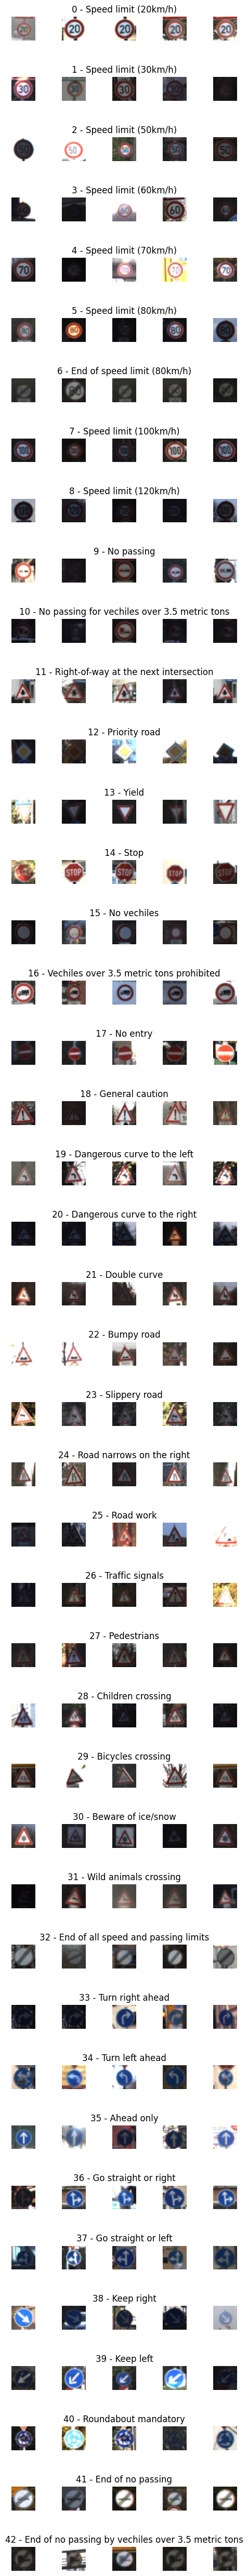

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')    # Load sign names

num_of_samples=[]    # To count samples per class

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]    # Images of class j
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])    # Add class label title
          num_of_samples.append(len(x_selected))    # Record number of samples

# **7. 📈 Dataset Distribution Visualization**
Prints the number of samples per class and plots a bar chart showing the distribution of images across all 43 classes in the training set.

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


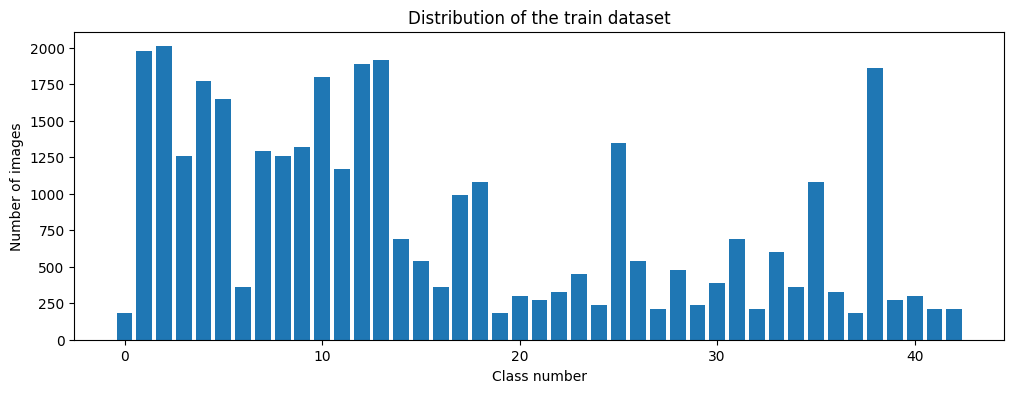

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

# **8. 🖼️ Sample Image Display**
* Displays the 3000th image from the training set without axes.

* Prints the shape of this image and its corresponding label.

(32, 32, 3)
1


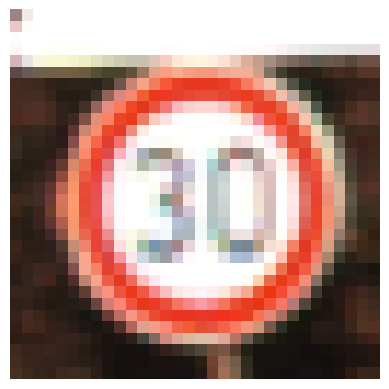

In [10]:
plt.imshow(X_train[3000])
plt.axis("off")
print(X_train[3000].shape)
print(y_train[3000])

# **9. ⚫ Grayscale Conversion**
* Defines a function to convert a color image to grayscale using OpenCV.

* Applies the function to the 3000th training image and displays the grayscale image without axes.

* Prints the new shape of the grayscale image.



(32, 32)


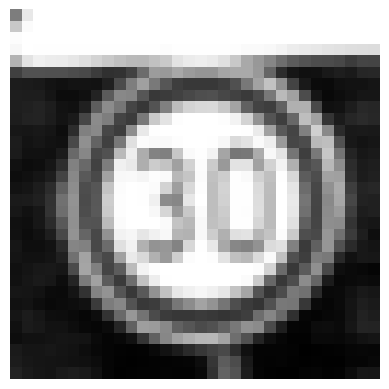

In [11]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Convert BGR image to grayscale
  return img

img = grayscale(X_train[3000])
plt.imshow(img,cmap='gray')
plt.axis("off")
print(img.shape)

# **10. 📈 Histogram Equalization**
* Defines a function to enhance the contrast of a grayscale image using histogram equalization via OpenCV.

* Applies this function to the grayscale image, then displays the enhanced image without axes.

* Prints the shape of the equalized image.

(32, 32)


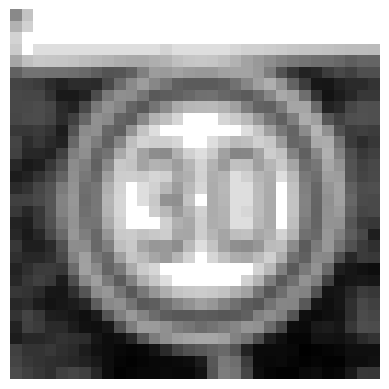

In [12]:
def equalize(img):
  img = cv2.equalizeHist(img)    # Enhance image contrast using histogram equalization
  return img

img = equalize(img)
plt.imshow(img, cmap='gray')
plt.axis("off")
print(img.shape)

# **11. 🛠️ Image Preprocessing**
* Defines a preprocessing function that converts images to grayscale, applies histogram equalization, and normalizes pixel values to the range [0,1].

* Applies this preprocessing to all training, validation, and test images.

* Displays a random preprocessed training image without axes.


In [13]:
def preprocessing(img):
  img = grayscale(img)    # Convert to grayscale
  img = equalize(img)    # Apply histogram equalization
  img = img/255    # Normalize pixel values to [0,1]
  return img

In [14]:
# Apply preprocessing to all datasets
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

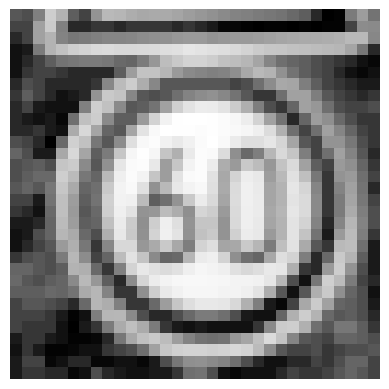

(34799, 32, 32)


In [16]:
# Display a random preprocessed training image
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap='gray')
plt.axis('off')
plt.show()
print(X_train.shape)    # Print shape of preprocessed training set


# **12. 🔄 Data Reshaping & Augmentation**
* Reshapes the training, validation, and test datasets to include a single grayscale channel (32x32x1).

* Uses Keras' ImageDataGenerator to create augmented images by applying random transformations such as shifts, zoom, shear, and rotation to increase dataset diversity.

* Generates a batch of augmented images and displays 15 of them without axes.

* Prints the shape of the augmented image batch.

In [17]:
# Reshape datasets to add single grayscale channel
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)


In [18]:
# Create an ImageDataGenerator for data augmentation with random transformations
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 32, 32, 1)


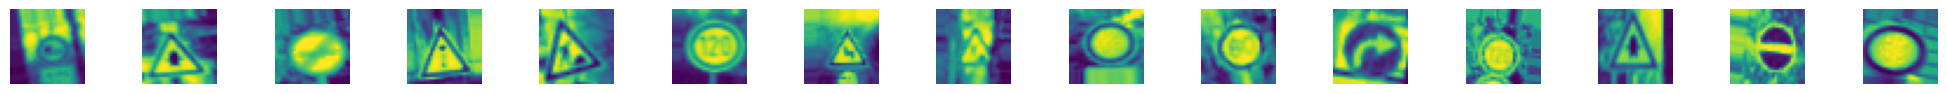

In [19]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

# Display 15 augmented images
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

# **13. 🧠 Model Creation & Data Preparation**
* Prints dataset shapes.

* Converts labels to one-hot vectors.

* Builds a CNN with Conv2D, MaxPooling, Flatten, Dense, and Dropout layers.

* Uses softmax activation for 43-class classification.

* Compiles model with Adam optimizer and categorical crossentropy loss.

In [20]:
# Print shapes of the datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [21]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [22]:
def better_model():
    model = Sequential()

    # Convolutional layers + pooling for feature extraction
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))

    model.add(Conv2D(60, (5,5), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30, (3,3), activation='relu'))
    model.add(Conv2D(30, (3,3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))    # Regularization

    model.add(Dense(num_classes, activation='softmax'))    # Output layer

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# **14. Model Summary 📋**
* Creates the CNN model by calling better_model().

* Prints the model architecture summary showing layers and parameters.

In [23]:
model = better_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


# **15. Model Training 🏋️‍♂️**
* Trains the CNN model using augmented data generator.

* Runs for 15 epochs with validation on validation set.

* Shuffles data each epoch for better training.

In [24]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                    steps_per_epoch=2000,
                    epochs=15,
                    validation_data=(X_val, y_val),
                    shuffle=True)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 694/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2854 - loss: 2.6255

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.4242 - loss: 2.0697 - val_accuracy: 0.9175 - val_loss: 0.2971
Epoch 2/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8062 - loss: 0.6250 - val_accuracy: 0.9660 - val_loss: 0.1203
Epoch 3/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8826 - loss: 0.3784 - val_accuracy: 0.9769 - val_loss: 0.0893
Epoch 4/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9101 - loss: 0.2868 - val_accuracy: 0.9798 - val_loss: 0.0716
Epoch 5/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9299 - loss: 0.2258 - val_accuracy: 0.9850 - val_loss: 0.0592
Epoch 6/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9375 - loss: 0.1991 - val_accuracy: 0.9800 - val_loss: 0.0639
Epoch 7/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9441 - loss: 0.1779 - val_accuracy: 0.9862 - val_loss: 0.0492
Epoch 8/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9496 - loss: 0.1620 - va

# **16. Plotting Model Loss 📉**
* Plots training and validation loss over epochs to monitor model performance.

* Helps check if model is learning well or overfitting.

Text(0.5, 0, 'epoch')

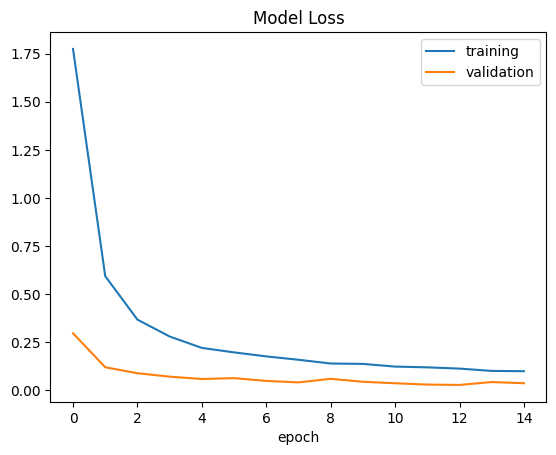

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

# **17. Plotting Model Accuracy 🎯**
* Visualizes training and validation accuracy during training.

* Helps evaluate how well the model is improving.

Text(0.5, 0, 'epoch')

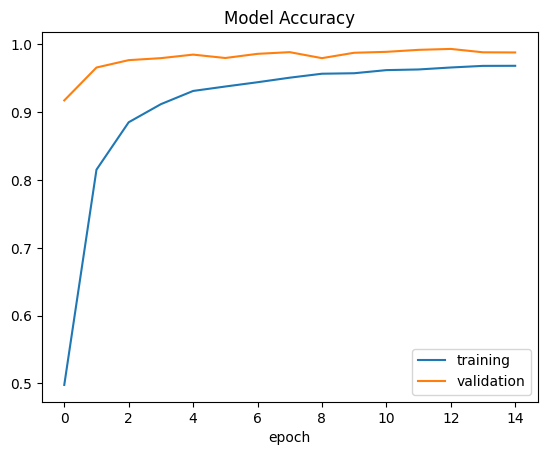

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

In [28]:
score = model.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.15688811242580414
The Accuracy score is:  0.963103711605072


# **18. Fetching an External Image 🌐🖼️**
* Downloads a traffic sign image from the internet using URL.

* Loads and displays the image for further processing.

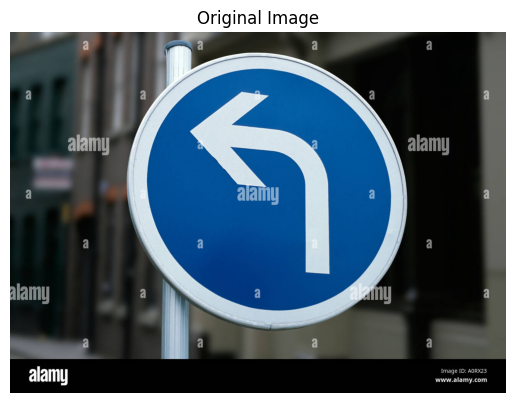

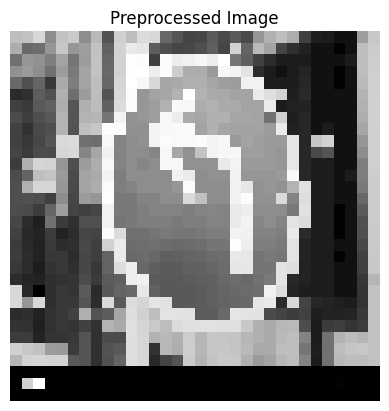

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 34


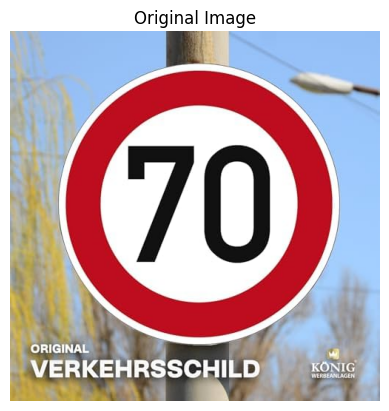

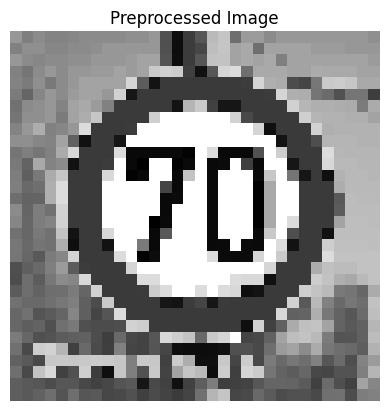

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 4


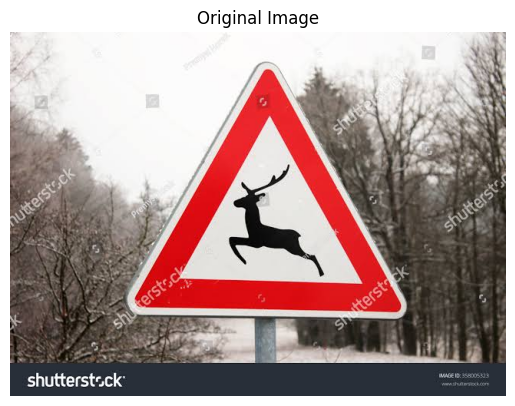

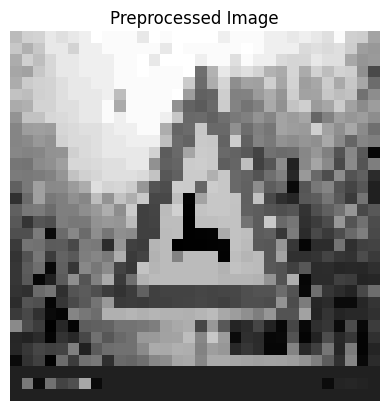

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: 31


In [45]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import cv2

def predict_image_from_url(url, model, preprocessing):
    # Download and open the image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Show the original image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    # Convert image to NumPy array
    img = np.asarray(img)

    # Resize image to 32x32
    img = cv2.resize(img, (32, 32))

    # Apply preprocessing
    img = preprocessing(img)

    # Show the preprocessed image
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Preprocessed Image")
    plt.show()

    # Reshape for model input: (1, 32, 32, 1)
    img = img.reshape(1, 32, 32, 1)

    # Make prediction
    pred_probs = model.predict(img)
    pred_class = np.argmax(pred_probs, axis=1)

    print("Predicted class:", pred_class[0])
    return pred_class[0]

# List of image URLs
url_list = [
    'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg',
    'https://m.media-amazon.com/images/I/51q9vQviSzL._AC_SY1000_.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSH_kNvfa6N4JeC2ZtDoy72yvz_RjN1OgNu1RbWHSyhHN1kLQ9Qydyl5FE&s=10'
]

# Predict each image
for url in url_list:
    predict_image_from_url(url, model, preprocessing)

# **19.Confusion Matrix & Class Accuracy 📊**
This code computes and visualizes the confusion matrix for test predictions, showing how well the model classifies each traffic sign. It also calculates the accuracy for each class and lists the 5 classes with the lowest accuracy.

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


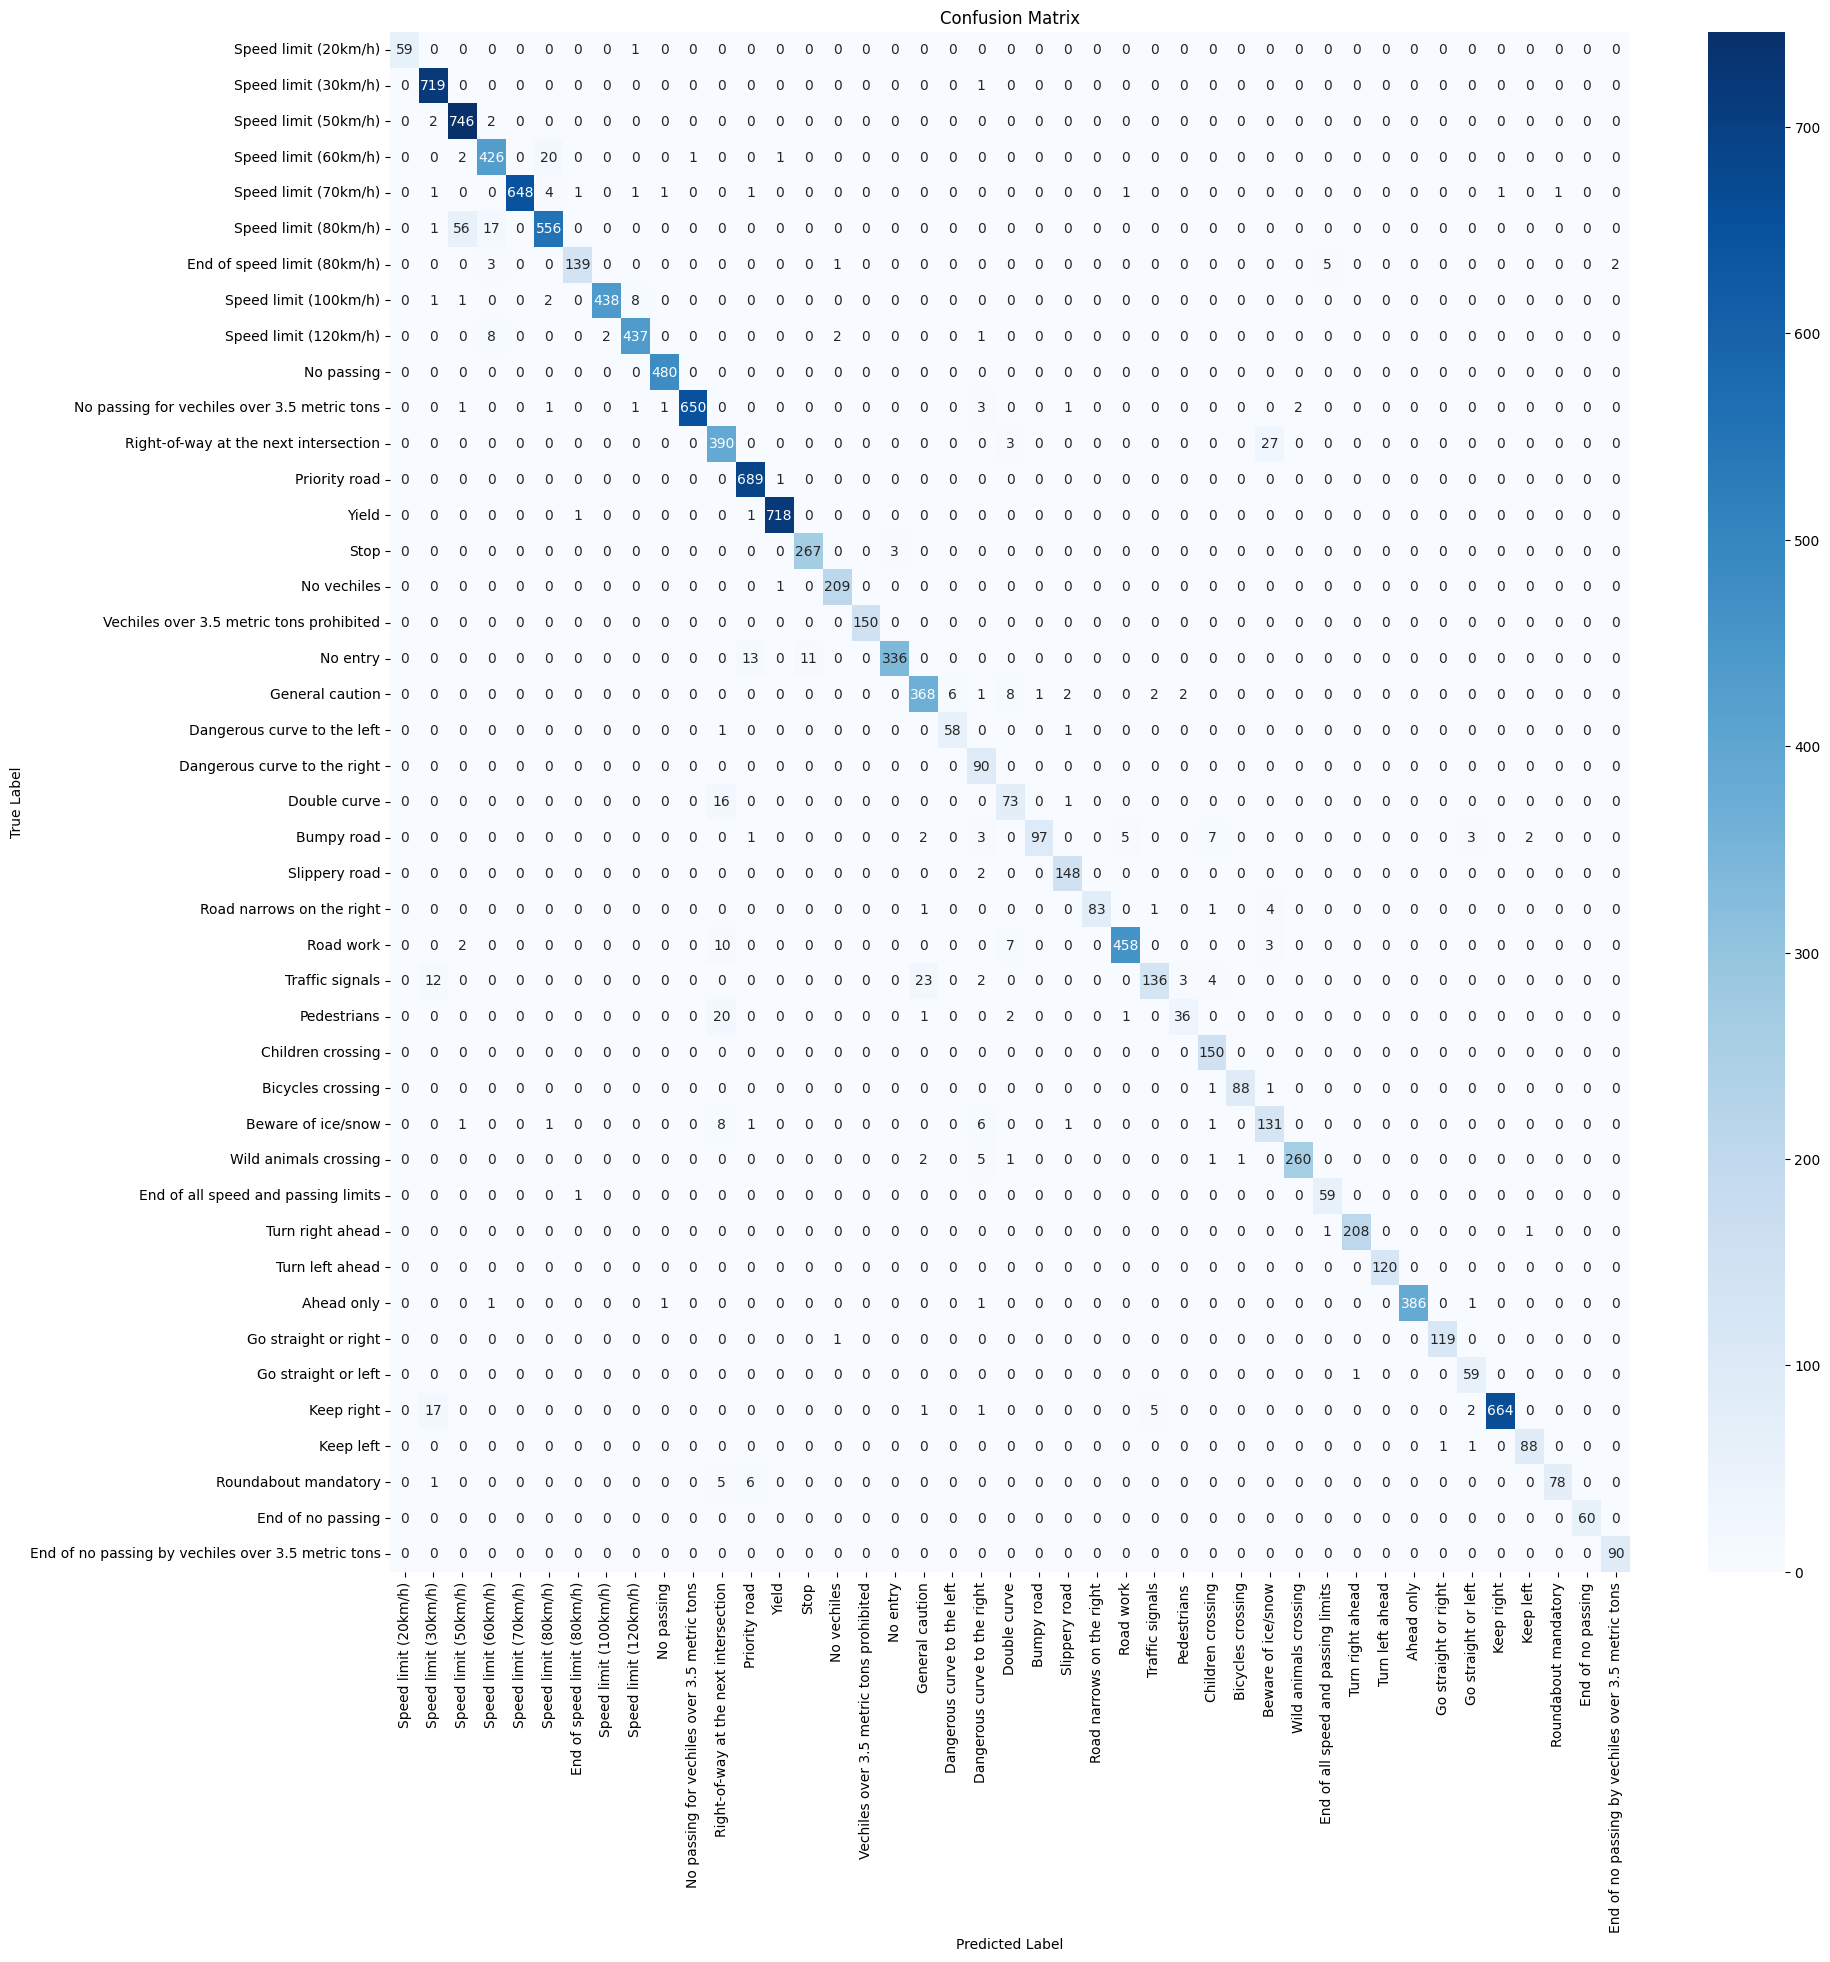


Top 5 classes with lowest accuracy:
Class 27 (Pedestrians): 60.00% accuracy
Class 26 (Traffic signals): 75.56% accuracy
Class 22 (Bumpy road): 80.83% accuracy
Class 21 (Double curve): 81.11% accuracy
Class 40 (Roundabout mandatory): 86.67% accuracy


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities and get predicted class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['SignName'],
            yticklabels=data['SignName'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Identify the 5 worst performing classes
worst_classes = np.argsort(class_accuracy)[:5]
print("\nTop 5 classes with lowest accuracy:")
for i in worst_classes:
    print(f"Class {i} ({data['SignName'][i]}): {class_accuracy[i]*100:.2f}% accuracy")


In [52]:
import gradio as gr
import numpy as np
from PIL import Image
import cv2

# Preprocessing functions (you can put your own functions here)
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0
    return img

# Prediction function
def preprocess_and_predict(img):
    img = np.array(img)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)
    pred_probs = model.predict(img)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    return f"Predicted class: {pred_class}"

# Create Gradio interface
iface = gr.Interface(
    fn=preprocess_and_predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Traffic Sign Classifier"
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://38cf18df30d389420c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
